In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, glob, shutil
import mahotas as mh

In [3]:
DATAFOLDER = '/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/'

In [4]:
os.listdir(DATAFOLDER)

['masks', 'images']

In [9]:
#train_image_dir = os.path.join(DATAFOLDER, 'Train_In')
#test_image_dir = os.path.join(DATAFOLDER, 'Test_In')
#train_mask_dir =  os.path.join(DATAFOLDER, 'Train_Out')
#test_mask_dir = os.path.join(DATAFOLDER, 'Test_Out')
image_dir = os.path.join(DATAFOLDER, 'images')
mask_dir = os.path.join(DATAFOLDER, 'masks')

In [25]:
# for i in os.listdir(train_mask_dir):
#     old_name = os.path.join(train_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(train_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)
# for i in os.listdir(test_mask_dir):
#     old_name = os.path.join(test_mask_dir, i)
#     print(old_name)
#     new_name = os.path.join(test_mask_dir, i.split('.')[0].zfill(4)+'.png')
#     print(new_name)
#     shutil.move(old_name, new_name)
#train_image_dir
#test_image_dir
#train_image_dir
#test_image_dir
image_dir
mask_dir
all_image_files

[]

In [26]:
all_image_files = sorted(sorted(glob.glob(image_dir +'/*.jpg')))
all_mask_files = sorted(sorted(glob.glob(mask_dir +'/*.jpg')))

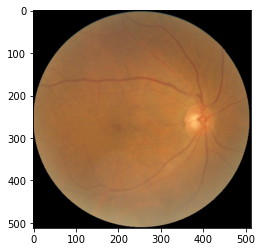

In [30]:
first_image = mh.imread(all_image_files[2])
imshow(first_image, cmap='gray')

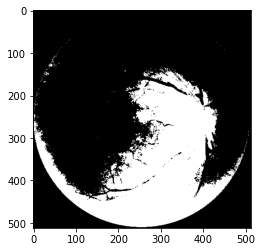

In [31]:
first_mask = mh.imread(all_mask_files[2])
imshow(first_mask, cmap='gray')

In [32]:
len(all_mask_files)

6392

In [33]:
first_mask.shape

(512, 512)

In [34]:
images = np.zeros((660, 512, 512), dtype=np.uint8)

In [35]:
from skimage.color import rgb2gray

counter = 0
for a in all_image_files:
    img = mh.imread(a)
    
    # convert RGBA images to RGB
    if img.shape[2] == 4:
        img = rgba2rgb(img)
    
    # grab left image
    left = img[0:512,0:512,:]
    right = img[0:512,512:,:]
    
    # convert RGB images to grayscale
    left_gray = rgb2gray(left)
    right_gray = rgb2gray(right)
    
    # assign grayscale images to images array
    images[counter] = left_gray
    images[counter+1] = right_gray
    
    counter += 2

ValueError: could not broadcast input array from shape (512,0) into shape (512,512)

In [36]:
masks = np.zeros((660, 512, 512), dtype=np.bool)

In [37]:
counter = 0
for a in all_mask_files:
    img = mh.imread(a)
    print(a)
    
    if img.ndim == 3:
        # grab left image
        left = img[0:512,0:512,0]
        right = img[0:512,512:,0]
    elif img.ndim == 2:
        left = img[0:512,0:512]
        right = img[0:512,512:]
    
    masks[counter] = left.astype(np.bool)
    masks[counter+1] = right.astype(np.bool)
    
    counter += 2

/hpcstor6/scratch01/r/ryan.zurrin001/Ocular_disease/masks/0_left.jpg


ValueError: could not broadcast input array from shape (512,0) into shape (512,512)

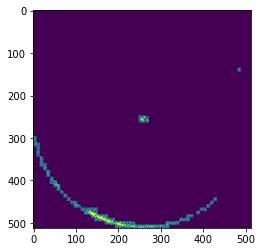

In [38]:
imshow(masks[0])

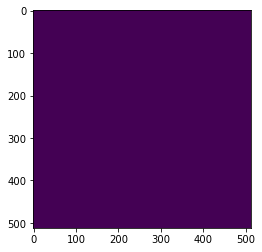

In [39]:
imshow(masks[-1])

In [40]:
images2 = np.expand_dims(images, axis=-1)

In [41]:
images2.shape

(660, 512, 512, 1)

In [42]:
masks2 = np.expand_dims(masks, axis=-1)

In [43]:
masks2.shape

(660, 512, 512, 1)

In [46]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_images', images2)

In [47]:
np.save('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_masks.npy', masks2)